In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10, 10)

### 1) T-test на равенство среднего некоторому генеральному значению

In [2]:
def plot_ttest_1samp(data, popmean, alpha = 0.05, return_statistics = False, calculate_cohens_d = True):
    '''
    Рисует график t-распределения Стьюдента и проверяет гипотезу о равенстве мат. ожидания генеральной выборки некоторому заданному числу (popmean)
    
    Нулевая гипотеза предполагает, что математическое ожидание генеральной выборки равно некоторому заданному числу. При уровне значимости p меньшим alpha
    нулевая гипотеза отвергается.
    
    Требования для применения критерия t-Стьюдента:
        1. Нормальность распределения данных
    
    Параметры
    ----------
    data: array_like
        Принимает на вход массив типа Numpy или Pandas
        
    popmean: float or int
        Предполагаемое математическое ожидание генеральной выборки
    
    alpha: float or int
        Предполагаемый уровень значимости
        
    return_statistics: bool
        Возвращать ли вычисленное t-наблюдаемое и p уровень значимости
        
    calculate_cohens_d: bool
        Вычислять ли коэффициент Коэна
    '''
    
    t_statistical, p_value = stats.ttest_1samp(data, popmean)
    t_critical = stats.t(df = len(data) - 1).ppf((1 - alpha / 2))
    
    
    t_arange = np.arange(-abs(t_statistical), abs(t_statistical), 0.01)
    t_vals = stats.t.pdf(t_arange, df = len(data) - 1)
    
    # Рисуем график t-распределения
    plt.plot(t_arange, t_vals, color = "k", label = "T-distribuion")   
        
    # Рисуем критические и статистические линии
    plt.vlines([-t_critical, t_critical], 0.0, t_vals.max(), label = "t-critical", color = "r", linestyle = "dashed")
    plt.vlines([-t_statistical, t_statistical], 0.0, t_vals.max(), label = "t-statistical", color = "b")

    # Заполняем область между статистическими линиями
    plt.fill_between(np.arange(-5, -abs(t_statistical), 0.01), stats.t.pdf(np.arange(-5, -abs(t_statistical), 0.01), df = len(data) - 1) , color = 'dodgerblue')
    plt.fill_between(np.arange(5, abs(t_statistical), -0.01), stats.t.pdf(np.arange(5, abs(t_statistical), -0.01), df = len(data) - 1), color = 'dodgerblue')
        
    # Выводим информацию о критических и статистических значениях
    print("t-statistical (Two side): ", [-t_statistical, t_statistical])
    print("t-crititcal (Two side): ", [-t_critical, t_critical])
    
    if abs(t_statistical) >= abs(t_critical):
        print("Отвергаем нулевую гипотезу! Мат. ожидание генеральной совокупности не равно {}".format(popmean))
    else:
        print("Принимаем нулевую гипотезу! Мат. ожидание генеральной совокупности примерно равно {}".format(popmean))
       
    plt.legend()
    
    
    if return_statistics:
        return t_statistical, p_value
    
    if calculate_cohens_d:
        cohens_d = abs(data.mean() - popmean) / data.std()
        print("Cohen's d:", cohens_d)

t-statistical (Two side):  [-0.5364635079313161, 0.5364635079313161]
t-crititcal (Two side):  [-1.9731570421553688, 1.9731570421553688]
Принимаем нулевую гипотезу! Мат. ожидание генеральной совокупности примерно равно 35
Cohen's d: 0.03976532086677054


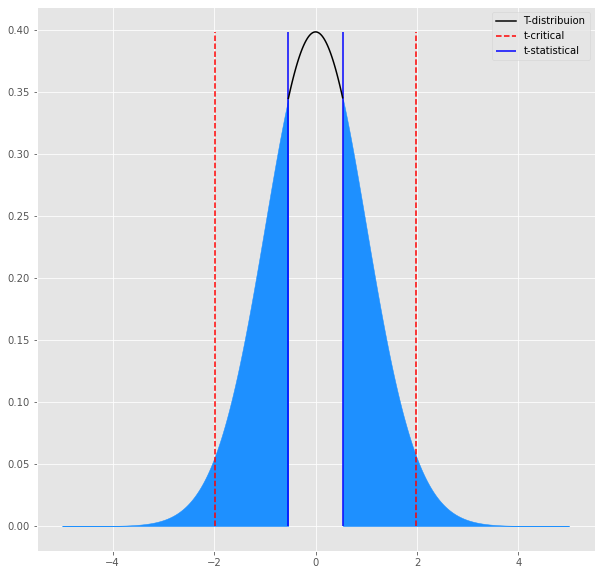

In [3]:
# Пример использования
data = sns.load_dataset("titanic").dropna()
plot_ttest_1samp(data["age"], 35, alpha = 0.05)

### 2) T-test на равенство средних для двух независимых выборок

In [4]:
def plot_ttest_ind(data1, data2, alpha = 0.05, return_statistics = False, calculate_cohens_d = True):
    '''
    Рисует график t-распределения Стьюдента и проверяет гипотезу о равенстве мат. ожиданий двух генеральных выборок
    
    Нулевая гипотеза предполагает, что математические ожидания двух генеральных выборок равны. При уровне значимости p меньшим alpha нулевая гипотеза отвергается.
    
    Требования для применения критерия t-Стьюдента:
        1. Нормальность распределения данных
        2. Равенство дисперсий двух выборок
    
    Параметры
    ----------
    data1: array_like
        Принимает на вход массив типа Numpy или Pandas (Первая выборка)
        
    data2: array_like
        Принимает на вход массив типа Numpy или Pandas (Вторая выборка)
    
    alpha: float or int
        Предполагаемый уровень значимости
        
    return_statistics: bool
        Возвращать ли вычисленное t-наблюдаемое и p уровень значимости
        
    calcualate_cohens_d: bool
        Вычислять ли коэффициент Коэна
    '''
        
    t_statistical, p_value = stats.ttest_ind(data1, data2)
    t_critical = stats.t(df = len(data) - 1).ppf((1 - alpha / 2))
    

    
    t_arange = np.arange(-abs(t_statistical), abs(t_statistical), 0.01)
    t_vals = stats.t.pdf(t_arange, df = len(data1) - 1)

    plt.plot(t_arange, t_vals, color = "k", label = "T-distribuion")
    
    plt.vlines([-t_critical, t_critical], 0.0, t_vals.max(), label = "t-critical", color = "r")
    plt.vlines([-t_statistical, t_statistical], 0.0, t_vals.max(), label = "t-statistical", color = "b")
    
    plt.fill_between(np.arange(-5, -abs(t_statistical), 0.01), stats.t.pdf(np.arange(-5, -abs(t_statistical), 0.01), df = len(data) - 1) , color = 'dodgerblue')
    plt.fill_between(np.arange(5, abs(t_statistical), -0.01), stats.t.pdf(np.arange(5, abs(t_statistical), -0.01), df = len(data) - 1), color = 'dodgerblue')
    
    plt.legend()
    
    if abs(t_statistical) >= abs(t_critical):
        print("Отвергаем нулевую гипотезу! Средние двух выборок не равны!")
    else:
        print("Недостаточно данных, чтобы отвергнуть нулевую гипотезу!")
    
    
     
    print("t_statistical (Two side): ", [-t_statistical, t_statistical])
    print("t_crititcal (Two side): ", [-t_critical, t_critical])
    
    if return_statistics:
        return statistics, p_value
    if calculate_cohens_d:
        var_pooled = np.sqrt(( (len(data1) - 1) * data1.var() + (len(data2) - 1) * data2.var() ) / (len(data1) + len(data2) - 2))
        cohens_d = abs((data1.mean() - data2.mean()) / var_pooled)
        
        print("Cohen's d:", cohens_d)

Недостаточно данных, чтобы отвергнуть нулевую гипотезу!
t_statistical (Two side):  [0.7390526763186428, -0.7390526763186428]
t_crititcal (Two side):  [-1.9731570421553688, 1.9731570421553688]
Cohen's d: 0.1493111883082797


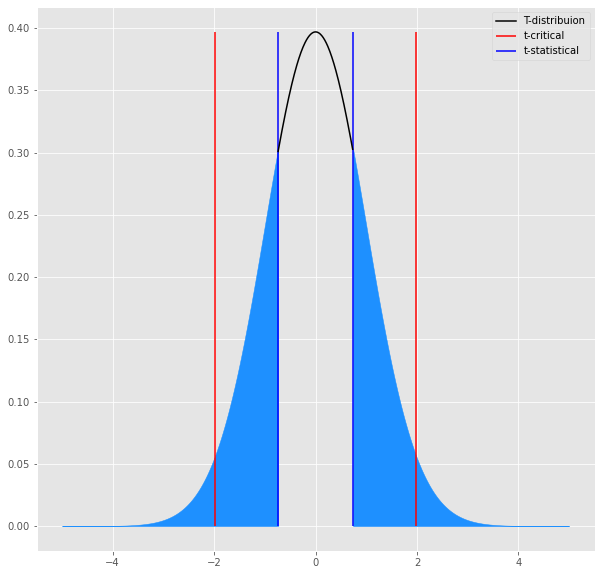

In [14]:
data1 = np.random.normal(loc = 15, scale = 10, size = 50)
data2 = np.random.normal(loc = 15, scale = 10, size = 50)
plot_ttest_ind(data1, data2)

### 3) U-критерий Мана-Уитни

In [17]:
statistics, p_value = stats.mannwhitneyu(data1, data2)

if p_value < 0.05: # Нулевая гипотеза: cредние равны
    print("Ранговые средние не равны! P-value: {}".format(p_value)) 
else:
    print("Ранговые средние примерно равны. P-value: {}".format(p_value))

Ранговые средние примерно равны. P-value: 0.17159012319652617


### 4) Тесты на равенство дисперсий

In [18]:
statistics, p_value = stats.bartlett(data1, data2)

if p_value < 0.05: # Нулевая гипотеза - дисперсии выборок равны. Тест Бартлетта являтеся параметрическим
    print("Дисперсии выборок не равны! P-value: {}".format(p_value))
else:
    print("Дисперсии выборок равны. P-value: {}".format(p_value))

Дисперсии выборок равны. P-value: 0.34159536800547885


In [19]:
statistics, p_value = stats.fligner(data1, data2)

if p_value < 0.05: # Нулевая гипотеза - дисперсии выборок равны. 
    print("Дисперсии выборок не равны! P-value: {}".format(p_value))
else:
    print("Дисперсии выборок равны. P-value: {}".format(p_value))

Дисперсии выборок равны. P-value: 0.8487273529201133


In [20]:
statistics, p_value = stats.levene(data1, data2)

if p_value < 0.05: # Нулевая гипотеза - дисперсии выборок равны. 
    print("Дисперсии выборок не равны! P-value: {}".format(p_value))
else:
    print("Дисперсии выборок равны. P-value: {}".format(p_value))

Дисперсии выборок равны. P-value: 0.9884378490252855


### 5) Биномиальный тест

In [21]:
k, n = 2, 10
p = 0.5
p_value = stats.binom_test(k, n, p) # Нулевая гипотеза - вероятность успеха равна 0.5

if p_value < 0.05:
    print("Вероятность успеха не равна {}. P-value: {}".format(p, p_value))
else:
    print("Вероятность успеха примерно равна {}. P-value: {}".format(p, p_value))

Вероятность успеха примерно равна 0.5. P-value: 0.10937500000000003


### Проверка на нормальность распределения 

In [7]:
def plot_histogram_and_qq(data, column_name = "Гистограмма", distribution_type="norm", normal_tests = True):
    '''
    Рисует график распределения выборки, кривую нормального распределения для данных и график QQ-plot для оценки
    нормальности распределения. Дополнительно считает такие статистики, как:
        1. Минимальное и максимальное значение (Большинство наблюдений нормального распределения находятся в пределах трёх сигм от среднего)
        2. Среднее, моду, медиану (У нормально распределённых наблюдений эти три статистики будут примерно равны)
        3. Коэффициенты ассиметрии и эксцесса (У нормально распределённых данных эти две статистики примерно равны 0)
        
    Если параметру normal_tests передано значение True, то данные проверяются на нормальность распределения с помощью следующих
    статистических тестов:
        1. Тест Д'Агостино (Для выборок любой размерности)
        2. Тест Харка-Бера (Для выборок, размерность которых больше 2000)
        3. Тест Шапиро-Уилка (Для выборок, размерность которых не превышает 2000)
        
    
    Параметры
    ----------
    data: array_like
        Массив значений Numpy или Pandas
    
    column_name: str
        Название колонки с данными. По умолчанию имеет значение - Гистограмма
    
    distribution_type: str
        Предполагаемое распределение. По умолчанию имеет значение - norm
    
    normal_tests: bool
        Проверка на нормальность распределения с помощью статистических тестов (За доп. информацией - смотреть выше)
    
    '''
    
    mu = np.mean(data)
    sigma = np.std(data)
    
    # Plot histogram of the 1000 points
    plt.figure(figsize=(12,6))
    ax = plt.subplot(1,2,1)
    count, bins, ignored = plt.hist(data, 30, density=True)
    ax.set_title(column_name)
    ax.set_xlabel('Значения')
    ax.set_ylabel('Частота')

    # Overlay the bell curve (normal distribution) on the bins data
    bell_curve = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
    plt.plot(bins, bell_curve, linewidth=2, color='r')

    # Q-Q plot
    plt.subplot(1,2,2)
    res = stats.probplot(data, dist=distribution_type, plot=plt)
    # (osm, osr) = res[0]
    # (slope, intercept, r) = res[1]
    # For details see: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html
    # print("slope, intercept, r:", slope, intercept, r)
    # print("r is the square root of the coefficient of determination")

    plt.show()
    
    print("-"*50)
    print("Мин/Макс значения: ", [np.min(data), np.max(data)])
    print("Правило трёх сигм: ", [mu - 3 * sigma, mu + 3 * sigma])
    print("Среднее/Мода/Медиана: ", [np.mean(data), stats.mode(data), np.median(data)])
    print("Ассиметрия/Эксцесс: ", [stats.skew(data), stats.kurtosis(data)])
    
    if normal_tests and distribution_type == "norm":
        print("-"*50)
        
        statistics, p = stats.normaltest(data)
        
        if p < 0.05:
            print("Д'Агостино тест: выборка взята не из нормального распределения! P-value: {}".format(p))
        else:
            print("Д'Агостино тест: выборка взята из нормального распределения. P-value: {}".format(p))
            
        if data.shape[0] > 2000:
            statistics, p = stats.jarque_bera(data)
            
            if p < 0.05:
                print("Харка-Бера тест: выборка взята не из нормального распределения! P-value: {}".format(p))
            else:
                print("Харка-Бера тест: выборка взята из нормального распределения. P-value: {}".format(p))
        else:
            statistics, p = stats.shapiro(data)
            
            if p < 0.05:
                 print("Шапиро тест: выборка взята не из нормального распределения! P-value: {}".format(p))
            else:
                print("Шапиро тест: выборка взята из нормального распределения. P-value: {}".format(p))
  

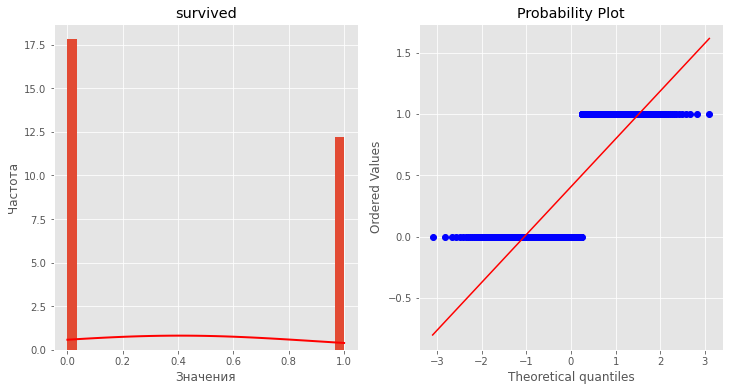

--------------------------------------------------
Мин/Макс значения:  [0, 1]
Правило трёх сигм:  [-1.0671842875480024, 1.879509217519991]
Среднее/Мода/Медиана:  [0.4061624649859944, ModeResult(mode=array([0], dtype=int64), count=array([424])), 0.0]
Ассиметрия/Эксцесс:  [0.3821403271943237, -1.8539687703318148]
--------------------------------------------------
Д'Агостино тест: выборка взята не из нормального распределения! P-value: 0.0
Шапиро тест: выборка взята не из нормального распределения! P-value: 9.59376012305171e-37


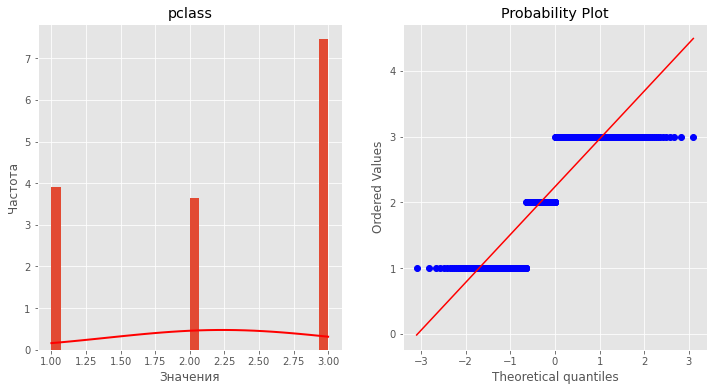

--------------------------------------------------
Мин/Макс значения:  [1, 3]
Правило трёх сигм:  [-0.27629326406166843, 4.7496826198039654]
Среднее/Мода/Медиана:  [2.2366946778711485, ModeResult(mode=array([3], dtype=int64), count=array([355])), 2.0]
Ассиметрия/Эксцесс:  [-0.4675584326868904, -1.4180284933019929]
--------------------------------------------------
Д'Агостино тест: выборка взята не из нормального распределения! P-value: 0.0
Шапиро тест: выборка взята не из нормального распределения! P-value: 1.2038891221630104e-31


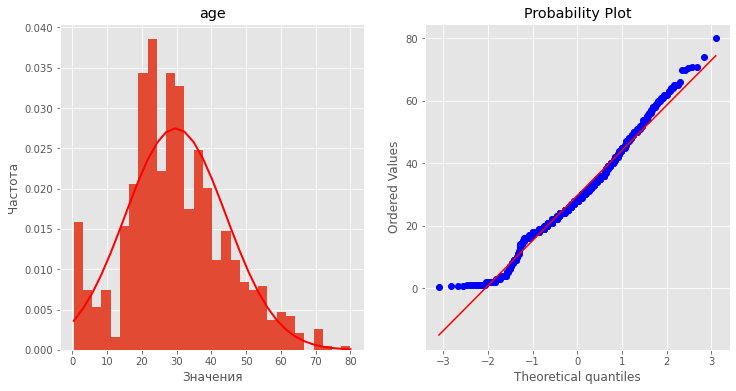

--------------------------------------------------
Мин/Макс значения:  [0.42, 80.0]
Правило трёх сигм:  [-13.84984580539313, 73.24808109951077]
Среднее/Мода/Медиана:  [29.69911764705882, ModeResult(mode=array([24.]), count=array([30])), 28.0]
Ассиметрия/Эксцесс:  [0.3882898514698657, 0.16863657224286044]
--------------------------------------------------
Д'Агостино тест: выборка взята не из нормального распределения! P-value: 0.00011709599657350757
Шапиро тест: выборка взята не из нормального распределения! P-value: 7.322165629375377e-08


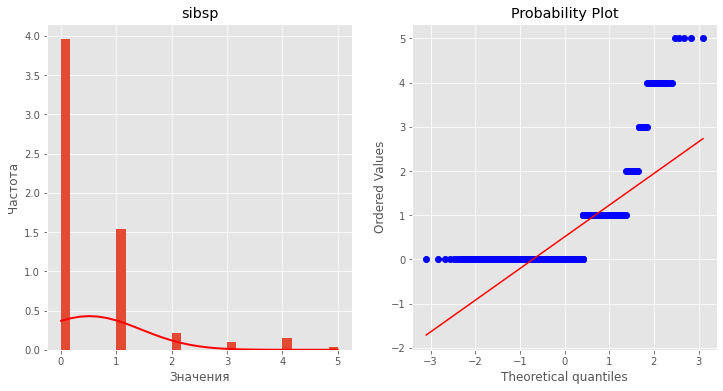

--------------------------------------------------
Мин/Макс значения:  [0, 5]
Правило трёх сигм:  [-2.274791309348229, 3.300001393381842]
Среднее/Мода/Медиана:  [0.5126050420168067, ModeResult(mode=array([0], dtype=int64), count=array([471])), 0.0]
Ассиметрия/Эксцесс:  [2.514280441256646, 6.987321424718031]
--------------------------------------------------
Д'Агостино тест: выборка взята не из нормального распределения! P-value: 3.6664071621656145e-85
Шапиро тест: выборка взята не из нормального распределения! P-value: 6.88923615028447e-38


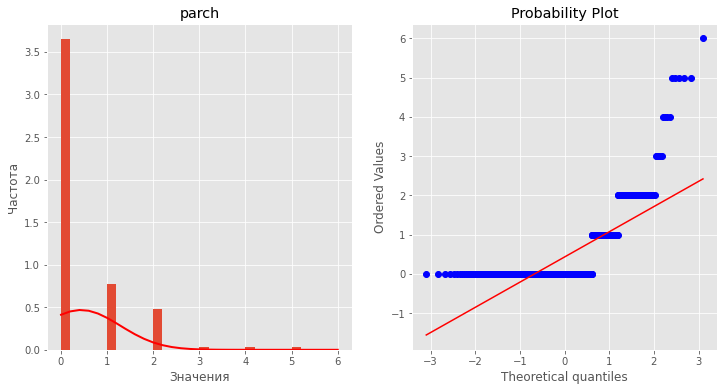

--------------------------------------------------
Мин/Макс значения:  [0, 6]
Правило трёх сигм:  [-2.1267022955713175, 2.9894473936105337]
Среднее/Мода/Медиана:  [0.43137254901960786, ModeResult(mode=array([0], dtype=int64), count=array([521])), 0.0]
Ассиметрия/Эксцесс:  [2.6134088550395473, 8.782858687538544]
--------------------------------------------------
Д'Агостино тест: выборка взята не из нормального распределения! P-value: 2.4349608875191525e-91
Шапиро тест: выборка взята не из нормального распределения! P-value: 9.272836150050506e-39


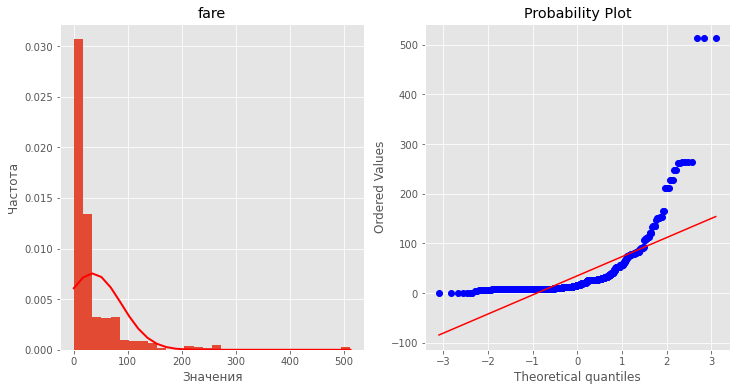

--------------------------------------------------
Мин/Макс значения:  [0.0, 512.3292]
Правило трёх сигм:  [-123.95106132655306, 193.3400893377574]
Среднее/Мода/Медиана:  [34.69451400560218, ModeResult(mode=array([13.]), count=array([41])), 15.7417]
Ассиметрия/Эксцесс:  [4.643848122581354, 30.699725237041868]
--------------------------------------------------
Д'Агостино тест: выборка взята не из нормального распределения! P-value: 4.05095611492928e-156
Шапиро тест: выборка взята не из нормального распределения! P-value: 7.462026426406797e-40


In [8]:
# Пример использования
df = sns.load_dataset("titanic").select_dtypes(include = [np.number]).dropna()

for column in df.columns:
    plot_histogram_and_qq(df[column], column_name = column, normal_tests = True, distribution_type = "norm")